In [154]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

#로지스틱 회귀
from statsmodels.api import Logit

#분류모델 평가 함수
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 나무 구조 시각화 및 의사결정나무
import graphviz 

from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 랜덤 포레스트 분류
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [155]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/HMEQ.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [156]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [157]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [158]:
print("Data 구조 :", df_raw.shape)
print("변수 :", df_raw.columns)

Data 구조 : (3748, 13)
변수 : Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


In [159]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

/tmp/ipykernel_1103/3605808036.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [188]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [195]:
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3,
                                    random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


In [190]:
df_train

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3164,0,27600,103898,130784.0,DebtCon,Office,11.000000,0,0.0,147.128398,0.0,29,42.009814
3314,1,30200,80951,116160.0,DebtCon,ProfExe,19.000000,4,0.0,130.360362,0.0,58,50.352999
93,1,5700,74172,79846.0,DebtCon,ProfExe,0.000000,0,0.0,157.009775,0.0,28,47.415229
1456,0,14900,22245,31531.0,DebtCon,Office,7.000000,0,0.0,91.074218,0.0,16,21.620580
3327,0,30500,57516,103086.0,DebtCon,Office,3.000000,0,0.0,166.199527,2.0,24,37.814089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0,28900,91683,127833.0,DebtCon,ProfExe,0.000000,1,0.0,187.242403,3.0,37,33.168757
3125,0,27100,20497,74244.0,DebtCon,Other,9.130398,1,2.0,93.060343,1.0,25,27.361340
1318,0,14000,51721,61193.0,DebtCon,Other,0.000000,0,0.0,186.999359,2.0,12,25.810011
723,0,10800,67740,108135.0,DebtCon,Office,11.000000,0,0.0,163.273832,1.0,12,38.383498


In [191]:
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG +
                                  DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2257
Time:                        23:14:32   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [192]:
log_model = Logit.from_formula("""BAD ~ C(JOB) + DEROG +
                                  DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2237
Time:                        23:14:34   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1652      0.534     -9.664      0.000      -6.213      -4.118
C(JOB)[T

In [87]:
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train > 0.5).astype(int) # 1/0 판정 임계값(1 발생 확률) 변경 가능
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Maxtrix: \n{}".format(confusion_matrix(df_train["BAD"],y_pred_train_class)),"\n")


Train 예측 결과 
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Maxtrix: 
[[2368   14]
 [ 192   49]] 



In [88]:
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(), "\n")
print("Confusion Maxtrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_test_class)),"\n")

Test 예측 결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Maxtrix: 
[[1016    5]
 [  81   23]] 



In [89]:
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["BAD"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits = 3))

Train 예측/분류 결과
Accuracy: 0.921

Confusion Matrix: 
[[2368   14]
 [ 192   49]] 

              precision    recall  f1-score   support

           0      0.926     0.995     0.959      1021
           1      0.821     0.221     0.348       104

    accuracy                          0.924      1125
   macro avg      0.874     0.608     0.654      1125
weighted avg      0.916     0.924     0.903      1125



<Axes: >

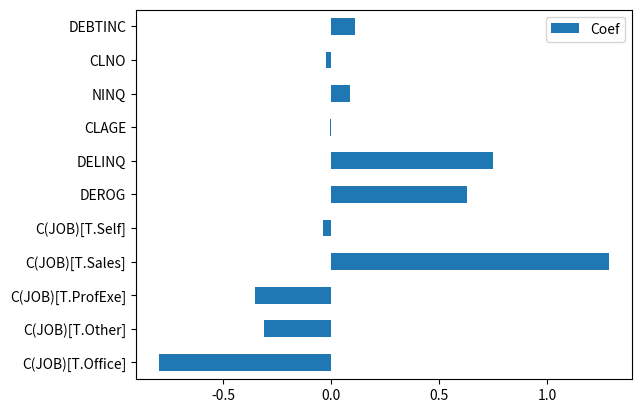

In [90]:
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]},index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [91]:
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)
df_scaled = pd.concat([df_numeric_scaled,df_char], axis = 1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [92]:
df_scaled["BAD"] = np.where(df_scaled["BAD"]> 0,1,0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [93]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                                  test_size = 0.3,
                                                  random_state = 1234)

In [94]:
scaled_log_model = Logit.from_formula("""BAD ~ LOAN +C(JOB) + DEROG +
                                  DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237870
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2610
Method:                           MLE   Df Model:                           12
Date:                Thu, 03 Aug 2023   Pseudo R-squ.:                  0.2248
Time:                        14:47:51   Log-Likelihood:                -623.93
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 4.215e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5051      0.197    -12.736      0.000      -2.891      -2.120
C(JOB)[T

<Axes: >

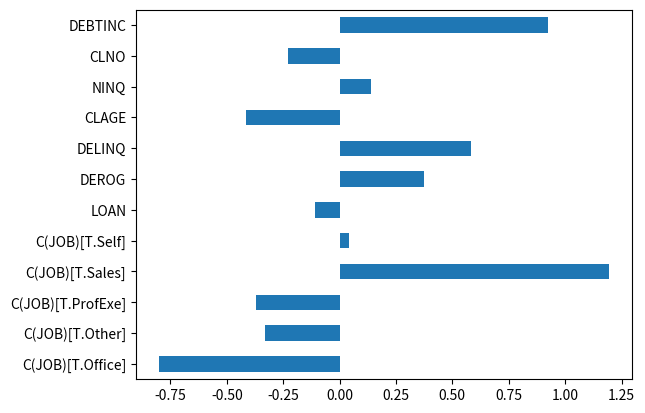

In [95]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef",legend = False)

# Decision Tree

In [193]:
from subprocess import call
from IPython.display import image

from sklearn.model_selection import GridSearchCV
# Decision Tree 분류
from sklearn.tree import DecisionTreeClassifier


ImportError: cannot import name 'image' from 'IPython.display' (/home/piai/anaconda3/lib/python3.10/site-packages/IPython/display.py)

In [97]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [98]:
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(\
  df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터 : Train (2623, 18)  Test (1125, 18)


In [99]:
from imblearn.over_sampling import SMOTE
print(df_raw.value_counts(["BAD"]),"\n")
print("BAD = 1 비율", df_raw.value_counts(df_raw["BAD"] == 1)/len(df_raw))


BAD
0      3403
1       345
dtype: int64 

BAD = 1 비율 BAD
False    0.907951
True     0.092049
dtype: float64


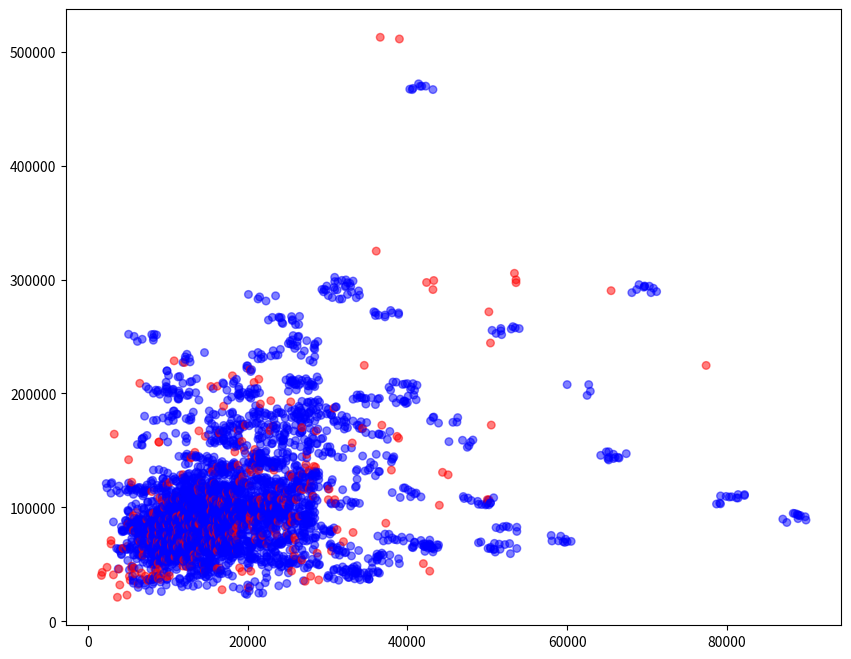

In [100]:
plt.figure(figsize = (10,8))
df_raw['color'] = np.where(df_raw["BAD"] ==1, "red", "blue")
plt.scatter(df_raw['LOAN'],df_raw['VALUE'], c=df_raw['color'], s= 30, alpha = 0.5)
plt.show()

In [101]:
sm = SMOTE(sampling_strategy = 'auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)
print('Over-Sampling 전: \n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후: '1':{}", format(sum(y_resampled ==1)))
print("Over-Sampling 후: '0':{}", format(sum(y_resampled ==0)))

Over-Sampling 전: 
 0    2382
1     241
Name: BAD, dtype: int64 

Over-Sampling 후 Train X:(4764, 18)
Over-Sampling 후 Train Y:(4764,)

Over-Sampling 후: '1':{} 2382
Over-Sampling 후: '0':{} 2382


In [102]:
df_resampled = pd.concat([x_resampled,y_resampled], axis = 1)
print(df_resampled.head())

    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  27600   103898  130784.0  11.0      0     0.0  147.128398   0.0    29   
1  30200    80951  116160.0  19.0      4     0.0  130.360362   0.0    58   
2   5700    74172   79846.0   0.0      0     0.0  157.009775   0.0    28   
3  14900    22245   31531.0   7.0      0     0.0   91.074218   0.0    16   
4  30500    57516  103086.0   3.0      0     0.0  166.199527   2.0    24   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  42.009814               1               0        0           1          0   
1  50.352999               1               0        0           0          0   
2  47.415229               1               0        0           0          0   
3  21.620580               1               0        0           1          0   
4  37.814089               1               0        0           1          0   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0            0     

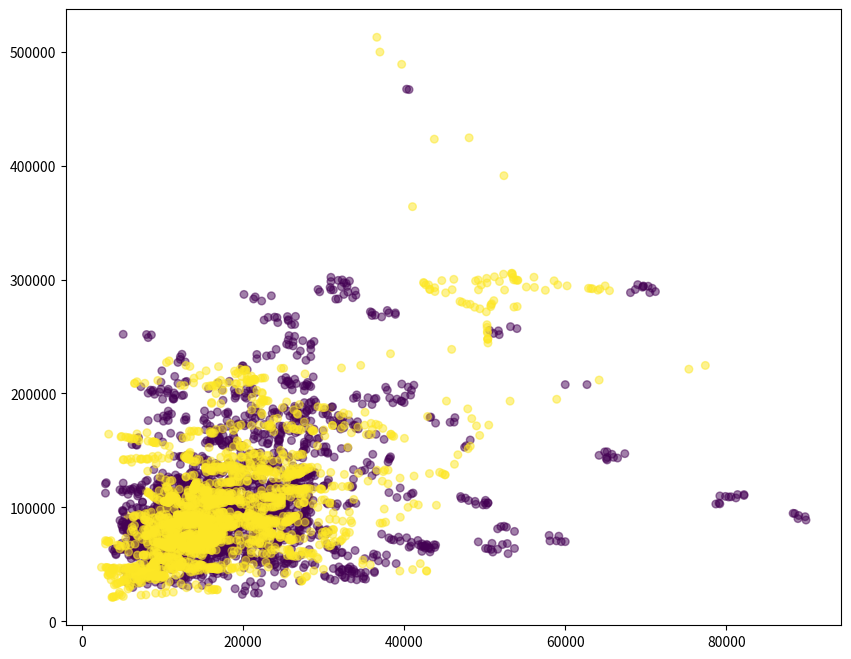

In [103]:
plt.figure(figsize = (10,8))
plt.scatter(df_resampled['LOAN'], df_resampled['VALUE'],
           c = df_resampled['BAD'], s= 30 , alpha =0.5)
plt.show()

In [107]:
tree_uncust = DecisionTreeClassifier(random_state = 1234)
tree_uncust.fit(df_train_x,df_train_y)

DecisionTreeClassifier(random_state=1234)

In [109]:
print("Accuracy on training set : {:.3f}".format(tree_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncust.score(df_test_x,df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.932


In [110]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [111]:
train_accuracy = []; test_accuracy = []

In [112]:
para_depth = [depth for depth in range(3,12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [113]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.934,0.921
1,4,0.937,0.928
2,5,0.940,0.930
3,6,0.941,0.930
4,7,0.947,0.935
5,8,0.951,0.933
6,9,0.957,0.933
7,10,0.960,0.938
8,11,0.963,0.936


<function matplotlib.pyplot.legend(*args, **kwargs)>

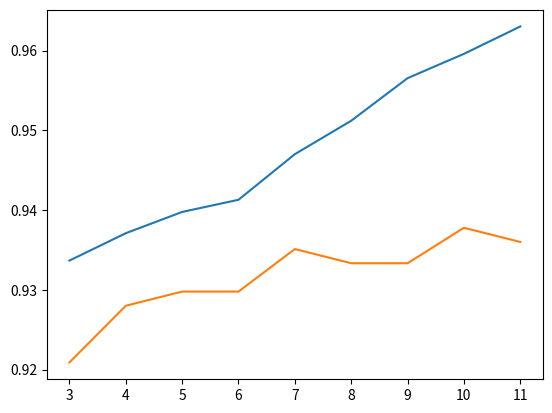

In [114]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend

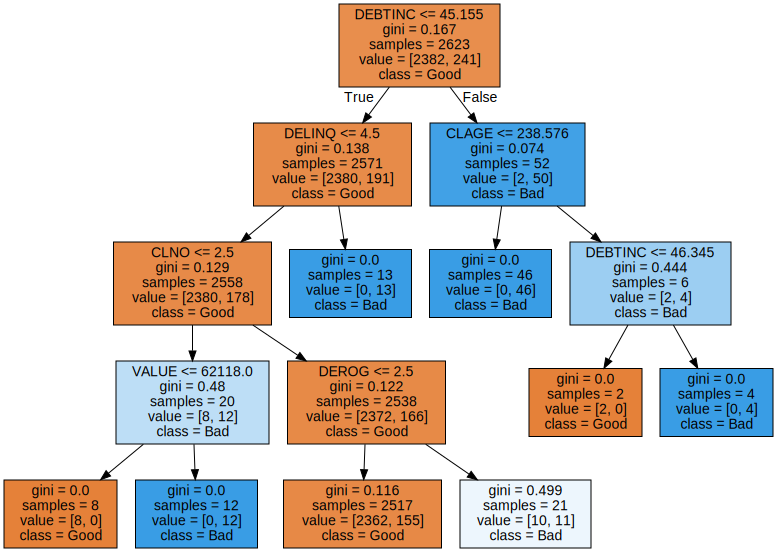

In [116]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

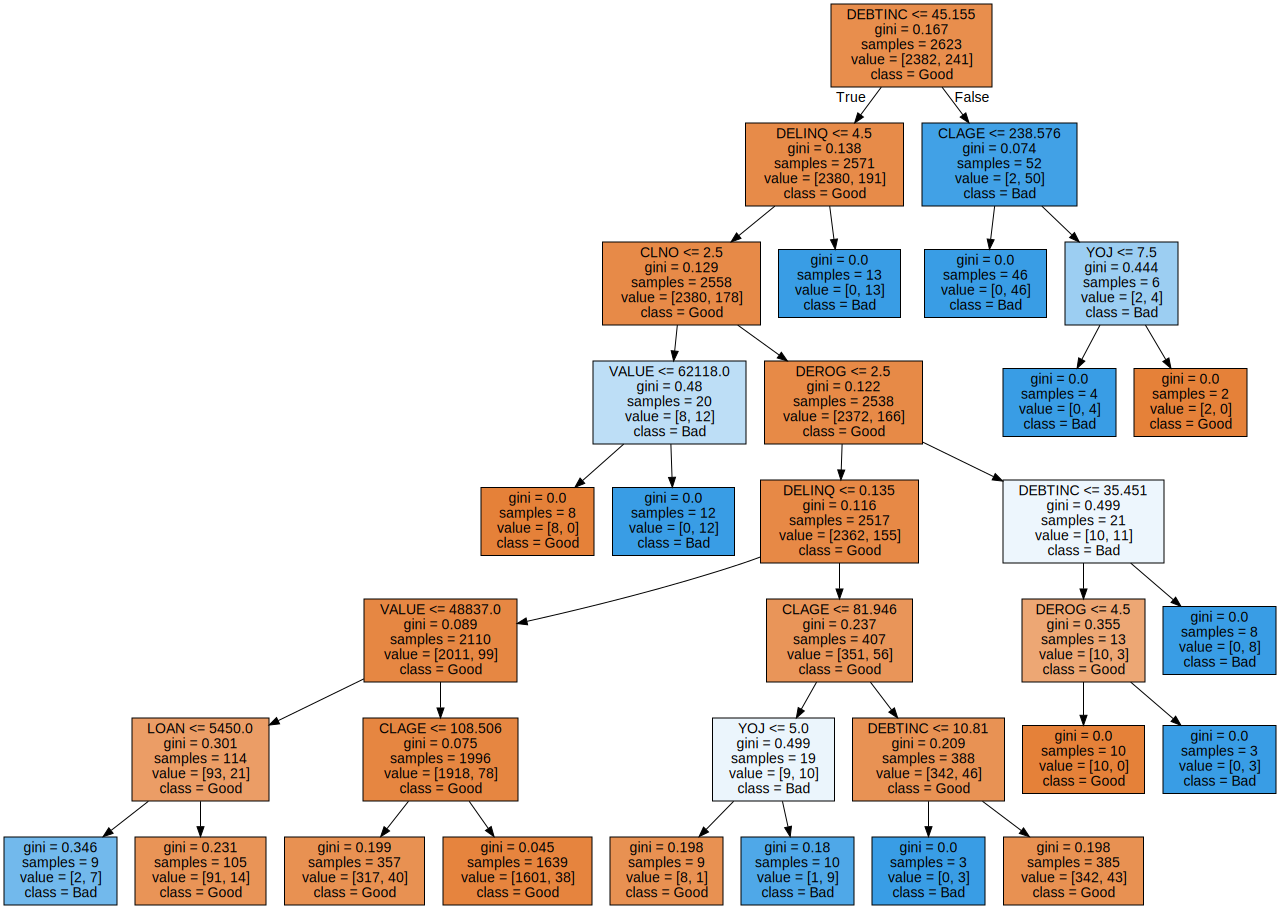

In [120]:
tree_high = DecisionTreeClassifier(max_depth = 7, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [121]:
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  2623 개
전체 자료의 1% =  26.23 개


In [125]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,15)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 7, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [126]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.942,0.930
1,30,0.937,0.922
2,40,0.937,0.922
3,50,0.937,0.922
4,60,0.937,0.922
5,70,0.937,0.922
6,80,0.937,0.922
7,90,0.937,0.922
8,100,0.937,0.922
9,110,0.937,0.922


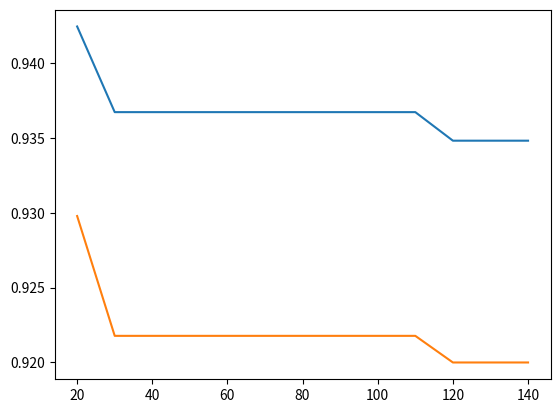

In [127]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")

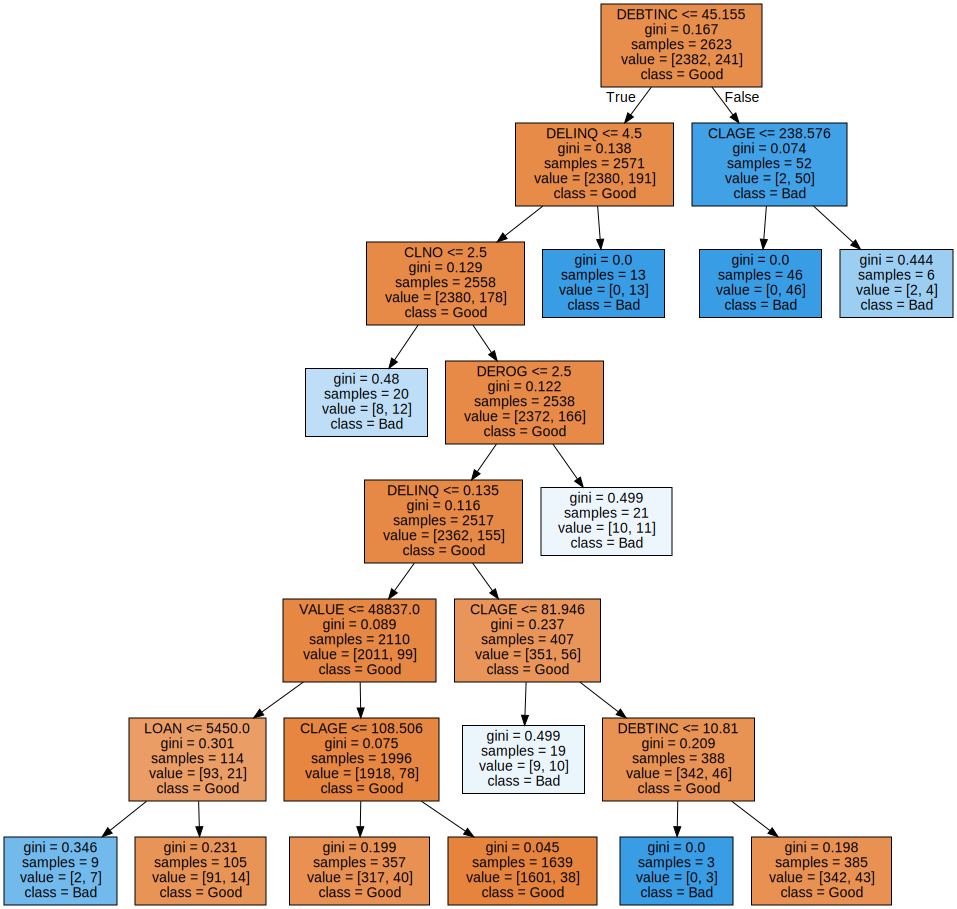

In [128]:
tree_low = DecisionTreeClassifier(max_depth = 7,min_samples_split = 50, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

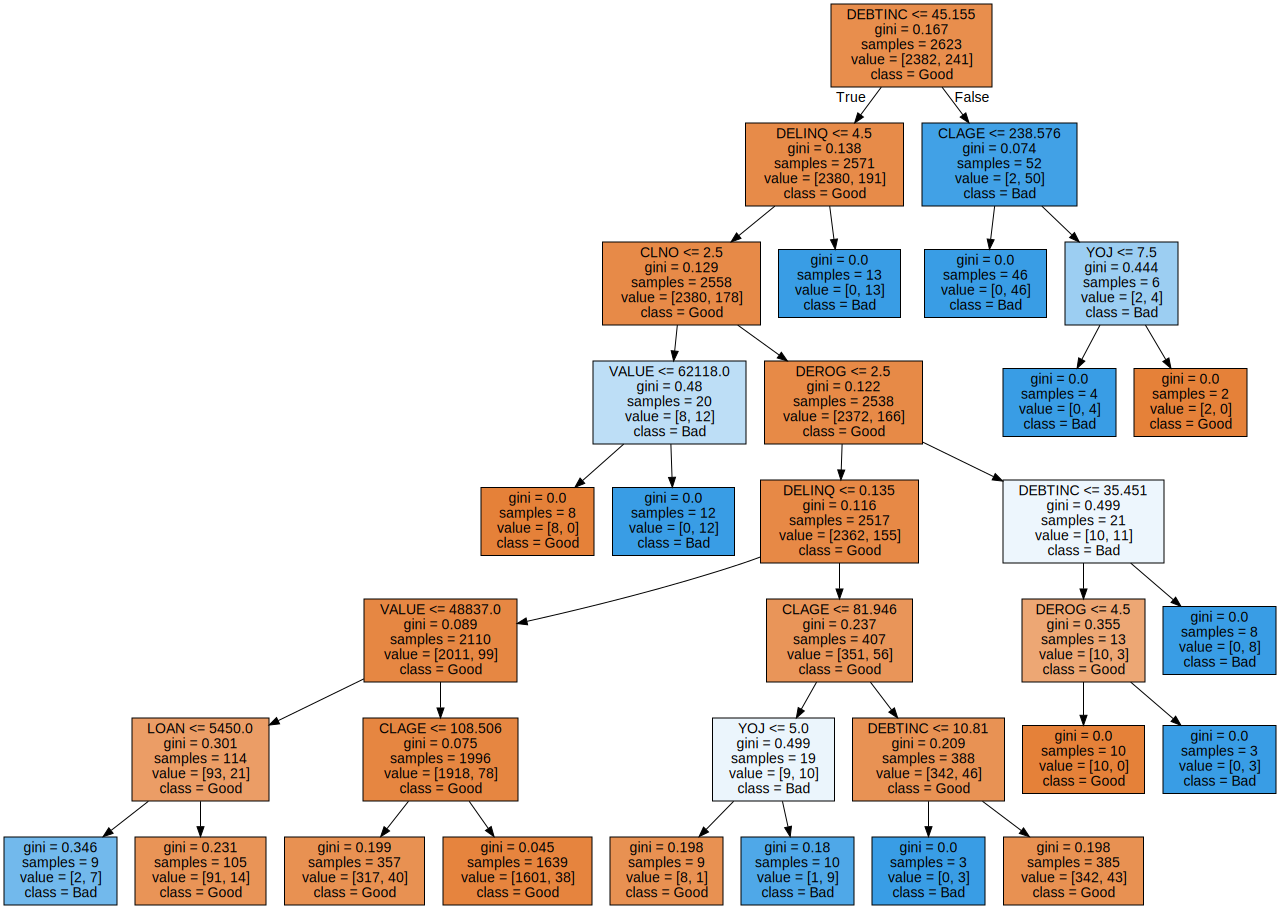

In [129]:
tree_high = DecisionTreeClassifier(max_depth = 7,min_samples_split = 110, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [135]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(5,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 7, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [136]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.940,0.928
1,12,0.935,0.918
2,14,0.936,0.917
3,16,0.936,0.919
4,18,0.935,0.920
5,20,0.934,0.920
6,22,0.934,0.927
7,24,0.934,0.927
8,26,0.934,0.927
9,28,0.933,0.925


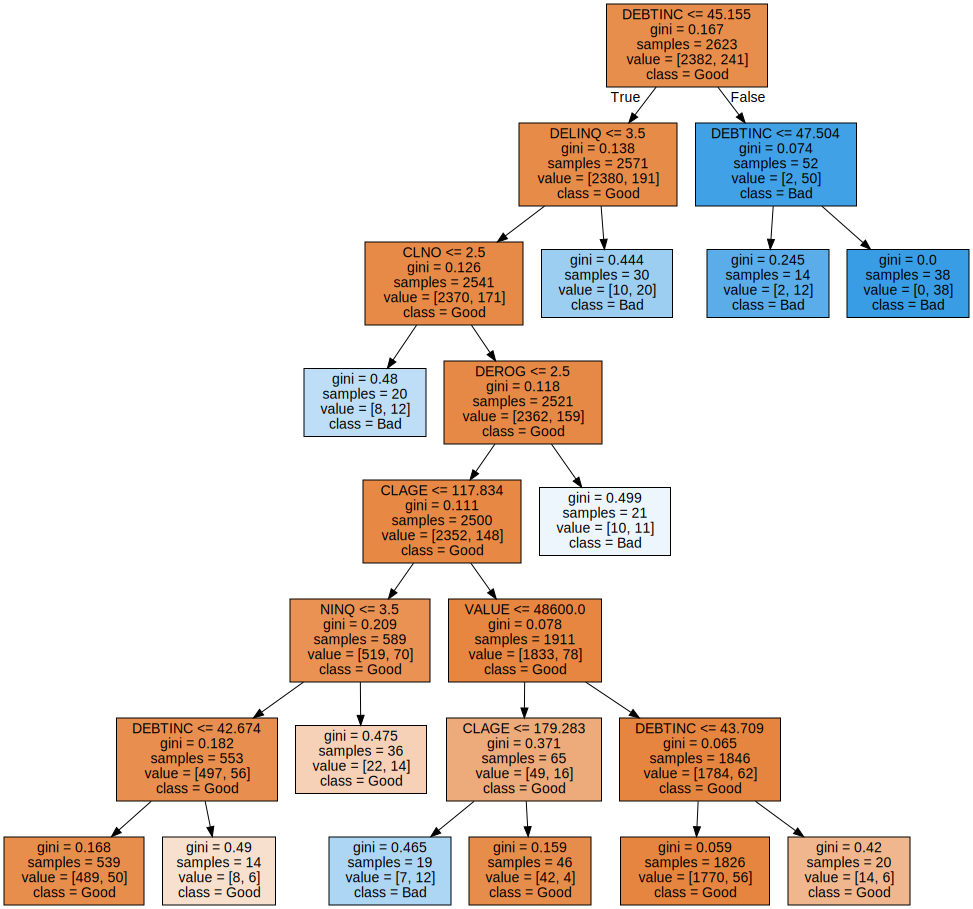

In [137]:
tree_low = DecisionTreeClassifier(max_depth = 7,min_samples_split = 50, min_samples_leaf = 14,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

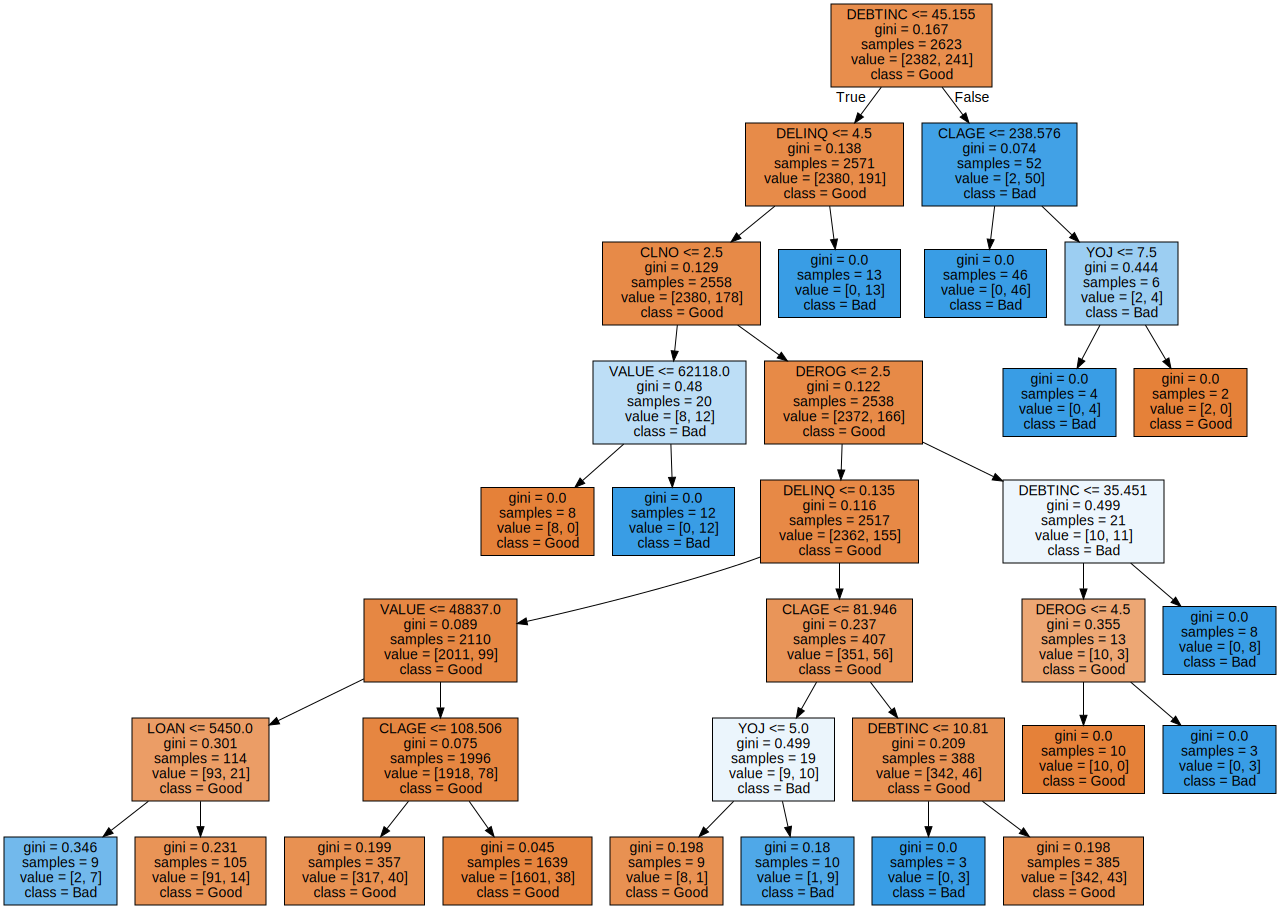

In [138]:
tree_high = DecisionTreeClassifier(max_depth = 7,min_samples_split = 50, min_samples_leaf = 18 ,random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [140]:
tree_final = DecisionTreeClassifier(max_depth = 7, min_samples_split = 50, min_samples_leaf = 14, random_state = 1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=14, min_samples_split=50,
                       random_state=1234)

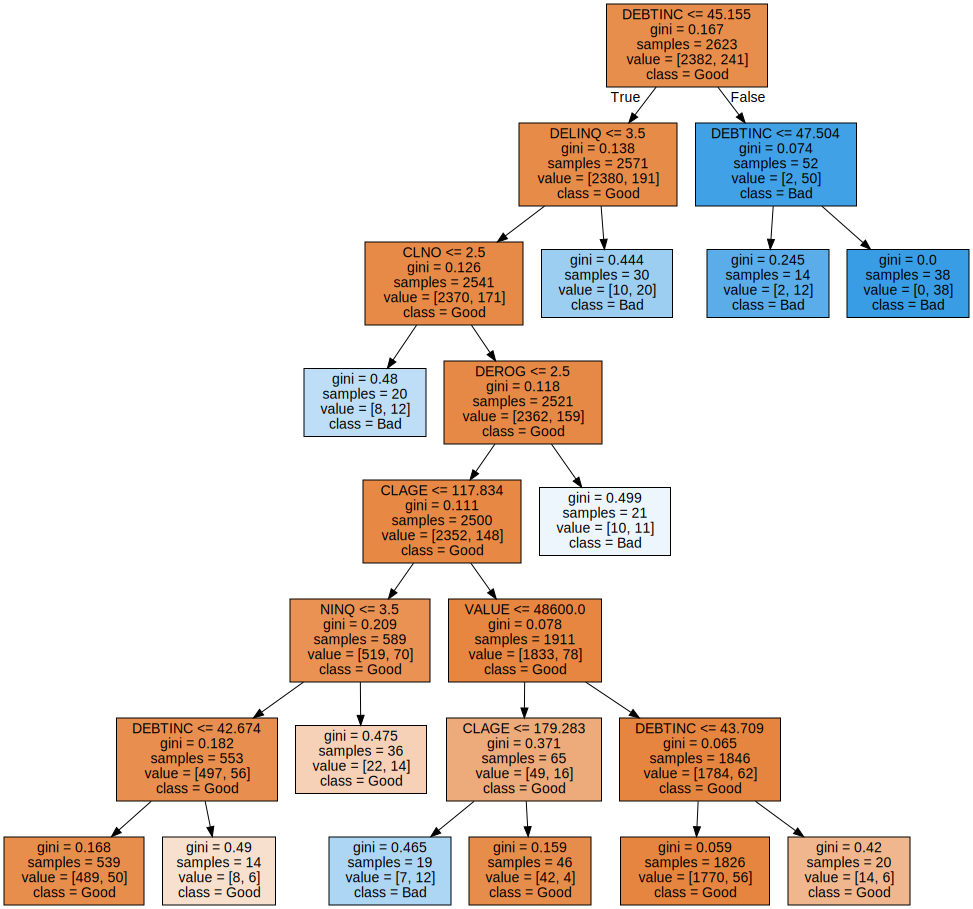

In [141]:
tree_final = DecisionTreeClassifier(max_depth = 7,min_samples_split = 50, min_samples_leaf = 14, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [145]:
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy : {0:.3f}\n". format(tree_final.score(df_test_x,df_test_y)))
print("Test Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))

Test Accuracy : 0.922

Test Confusion matrix :
[[1002   19]
 [  69   35]]


In [147]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.566
5,DELINQ,0.139
6,CLAGE,0.088
8,CLNO,0.075
4,DEROG,0.059
2,VALUE,0.037
7,NINQ,0.037
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000


Text(0, 0.5, '설명변수')

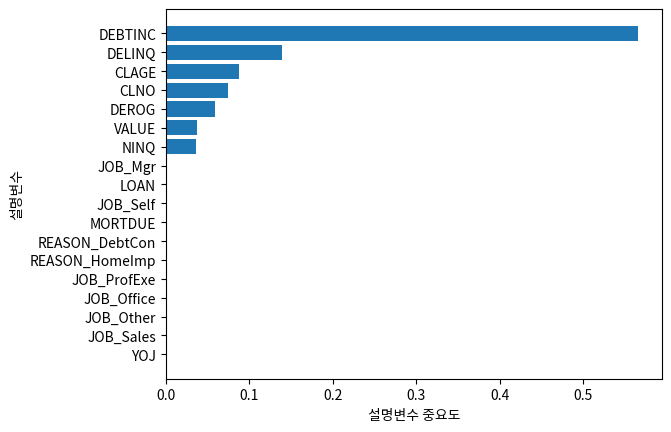

In [149]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 랜덤 포레스트

In [161]:
rf_uncust = RandomForestClassifier(random_state = 1234)
rf_uncust.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.946


In [162]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


In [164]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["MinSamplesSplit"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [165]:
df_accuracy_n.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


<function matplotlib.pyplot.legend(*args, **kwargs)>

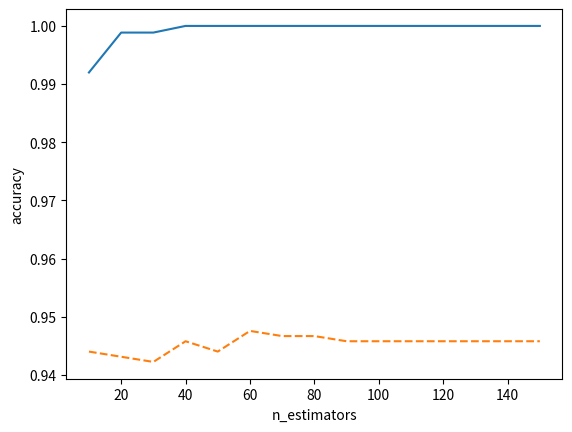

In [168]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend

In [169]:
oob_error =[]

for v_n_estimator in range(5,121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

Text(0.5, 0, 'n_estimators')

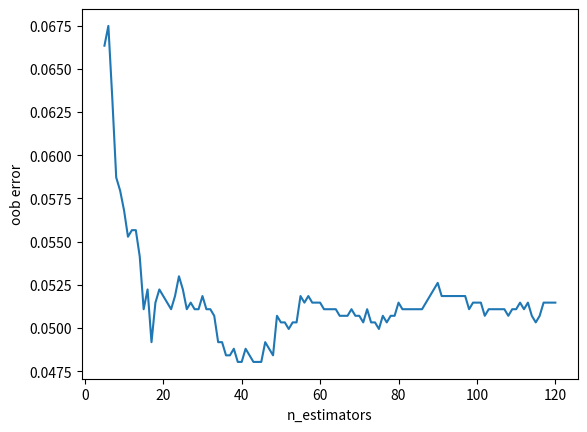

In [170]:
plt.plot(range(5,121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [173]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(3,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth,n_estimators = 100, random_state =1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [174]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.932,0.928
1,4,0.933,0.930
2,5,0.938,0.931
3,6,0.941,0.932
4,7,0.945,0.934
5,8,0.949,0.936
6,9,0.951,0.935
7,10,0.956,0.938


<function matplotlib.pyplot.legend(*args, **kwargs)>

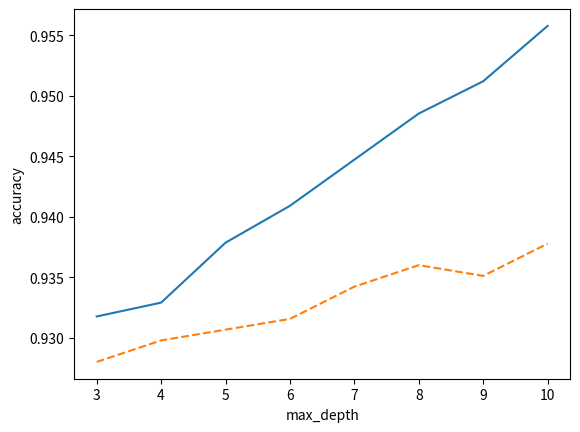

In [175]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend

In [176]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 6,n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [177]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.940,0.931
1,20,0.935,0.931
2,30,0.934,0.931
3,40,0.934,0.931
4,50,0.933,0.931
5,60,0.933,0.931
6,70,0.934,0.931
7,80,0.932,0.929
8,90,0.932,0.929
9,100,0.932,0.929


<function matplotlib.pyplot.legend(*args, **kwargs)>

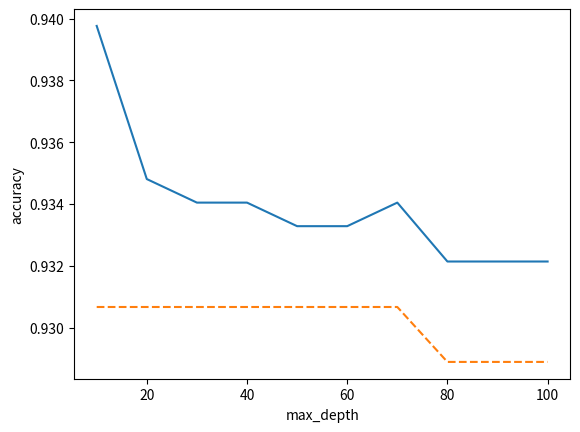

In [178]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend

In [179]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 6,n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [194]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.939,0.932
1,10,0.933,0.930
2,15,0.927,0.927
3,20,0.927,0.925
4,25,0.927,0.925
5,30,0.926,0.924
6,35,0.926,0.924
7,40,0.925,0.924
8,45,0.923,0.921
9,50,0.914,0.915


<function matplotlib.pyplot.legend(*args, **kwargs)>

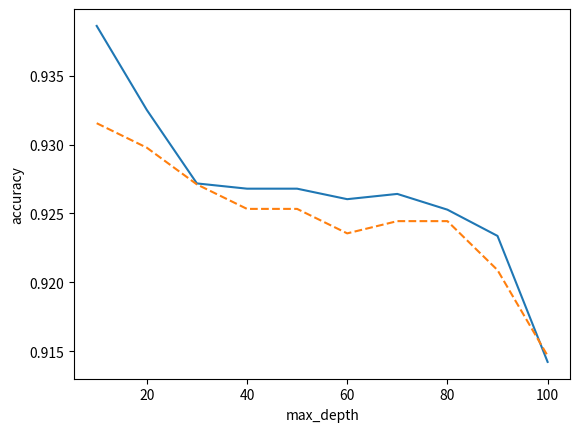

In [181]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend

In [183]:
rf_final = RandomForestClassifier(max_depth = 6,n_estimators = 100, min_samples_leaf = 20, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}". format(rf_final.score(df_test_x,df_test_y)))
print("Accuracy on test set : {:.3f}". format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits =3))

Accuracy on training set : 0.925
Accuracy on test set : 0.925
Confusion matrix :
[[1021    0]
 [  84   20]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



In [184]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_
df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.502
5,DELINQ,0.148
6,CLAGE,0.064
4,DEROG,0.058
8,CLNO,0.056
7,NINQ,0.050
0,LOAN,0.036
2,VALUE,0.036
3,YOJ,0.016
1,MORTDUE,0.014


Text(0, 0.5, '설명변수')

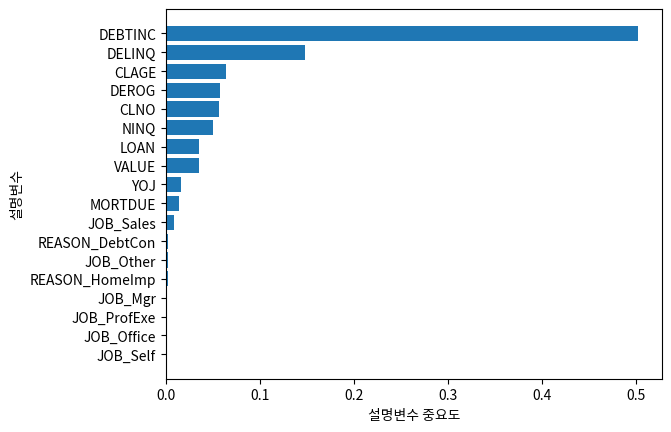

In [186]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")